**Importing libraries**







In [ ]:
!git clone https://github.com/shreshth-29/img img


In [ ]:
#OpenCV-Python is a library of Python bindings designed to solve computer vision problems 
# can be used to perform tasks like face detection, objection tracking, landmark detection, and much more!
import cv2

#NumPy is a library for the Python programming language, adding support for large,
#multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
#numpy is required frequently along with openCV for image processing applications , as images are nothing but arrays of pixels.
import numpy as np

#Pyautogui is a cross-platform GUI automation Python module for human beings.
#It enables python to interact with your mouse/keyboard.
#import pyautogui

#To work with/keep track of time:
import time


**Global Variables**

In [ ]:
### Global variables

#we define arrays specifying the range of the colors to be detected. (Red, Yellow and Blue)

blue_range = np.array([[88,78,20],[128,255,255]]) #HSV color codes
yellow_range = np.array([[21,70,80],[61,255,255]])
red_range = np.array([[158,85,72],[180 ,255,255]])

#centroids of R,Y,B regions detected
b_cen, y_pos, r_cen = [240,320],[240,320],[240,320]
cursor = [960,540]

# Area ranges for contours of different colours to be detected
r_area = [100,1700] #simple lists
b_area = [100,1700]
y_area = [100,1700]

# Rectangular kernel for eroding and dilating the mask for primary noise removal 
kernel = np.ones((7,7),np.uint8) #2D array (matrix of 7x7) having all entries 1
#np.uint8: unsigned 8 bit integer (0 to 255). required for openCV(instead of simply 'int')

perform = False
showCentroid = False

**Functions**


1.   OpenCV Functions (for processing video feed)
2.   pyautogui functions (for interacting with the mouse)


**OpenCV functions**

In [ ]:
###Function definitions
#when a function is called, the code within is executed on the argument.

#literally does nothing!
def nothing(x):
    pass

In [ ]:

def makeMask(hsv_frame, color_Range):

    #Masking,useful when we want to segment out something from the environment, based on color.

    #pixel values falling the range--> white, rest black
    #color operations easier in HSV space

    mask = cv2.inRange() #image, lower bound, upper bound

    # erosion and dilation on images
    eroded = cv2.erode( mask, kernel, iterations=1)
    dilated = cv2.dilate( eroded, kernel, iterations=1)
    
    return dilated
  

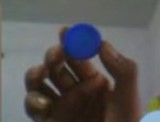

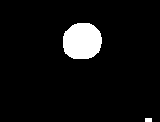

In [ ]:
#example: calling the function
from google.colab.patches import cv2_imshow #for showing images in colab.

image=cv2.imread('/content/img/vlue.jpg')
#original image
cv2_imshow(image)

#now we will create a mask, to segment out the blue region

range=np.array([[88,78,20],[128,255,255]]) #for blue
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #convert image to hsv space
#function called
masked=makeMask(hsv, range)
#image displayed
cv2_imshow(masked)

In [ ]:
# Custom calibration, in case the detection with default ranges doesnt work
def calibrateColor(color, def_range):
    
    global kernel
    name = 'Calibrate '+ color
    cv2.namedWindow(name)

    cv2.createTrackbar('Hue', name, def_range[0][0]+20, 180, nothing)
    cv2.createTrackbar('Sat', name, def_range[0][1]   , 255, nothing)
    cv2.createTrackbar('Val', name, def_range[0][2]   , 255, nothing)

    while(1):
        ret , frameinv = cap.read()
        frame=cvlip(framei2.fnv ,1)

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        hue = cv2.getTrackbarPos('Hue', name)
        sat = cv2.getTrackbarPos('Sat', name)
        val = cv2.getTrackbarPos('Val', name)

        lower = np.array([hue-20,sat,val])
        upper = np.array([hue+20,255,255])

        mask = cv2.inRange(hsv, lower, upper)
        eroded = cv2.erode( mask, kernel, iterations=1)
        dilated = cv2.dilate( eroded, kernel, iterations=1)

        cv2.imshow(name, dilated)       

        k = cv2.waitKey(5) & 0xFF
        if k == ord(' '): #if space pressed
            cv2.destroyWindow(name)
            return np.array([[hue-20,sat,val],[hue+20,255,255]])
        elif k == ord('d'): #if D pressed
            cv2.destroyWindow(name)
            return def_range

In [ ]:
# To bring to the top the contours with largest area in the specified range
# Used in drawContour()
def swap( array, i, j):


In [ ]:
#example: calling the function

array=[1,2,5,4]
swap(array,1,2) #2nd and 3rd elements to be swapped.
#note that function doesnt return anything
print(array)
            

[1, 5, 2, 4]


In [ ]:
def drawCentroid(vid, color_area, mask, showCentroid): #to display the centroid of the detected regions
    
    #contour==boundary/outline. An array of points making a closed path.
    #in our case it will be an outline of the finger around which the coloured paper is wrapped.

   contour, _ = cv2.findContours( mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #returns an array containing the contours
   cnt=list(contour) #convert to a list
   l=len(cnt) #will give you the number of contours
   area = list(np.zeros(l)) #1D array (list) of size l. Initialised to all zeros.

   i=0
   for c in contour:
     cnt_area=cv2.contourArea(c)
     if cnt_area>color_area[0] and cnt_area<color_area[1]:
          #if area of contour is within provided range
            area[i] = cnt_area
            #append the area to the area list.
            i+=1
     else:
          #if not in range, then append 0 in the area list
            area[i] = 0
            i+=1

   a = sorted( area, reverse=True) #sort the area list in descending order.

   
   # bringing contours with largest valid area to the top
   k=0
   while(k<l):
    if area[k] == a[0]: #a[0] is the largest contour area
      swap(cnt, k, 0)  
      k+=1

    #at this point, the contour list will contain the contour with the largest area as it's first element. (contour[0])
    #This will be the region where the paper is wrapped. We will work with this region now.

   if l > 0 :      
        # finding centroid using method of 'moments'
        #M = cv2.moments(contour[0])
        M = cv2.moments(cnt[0])
        if M['m00'] != 0:
            cx = int(M['m10']/M['m00'])
            cy = int(M['m01']/M['m00'])
            center = (cx,cy)
            if showCentroid:
                cv2.circle( vid, center, 5, (0,0,255), -1)
                    
            return center
   else:
        
        return (-1,-1)

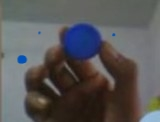

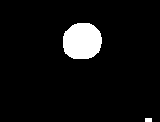

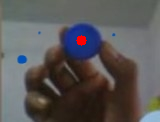

In [ ]:
#example with contours
image=cv2.imread('/content/img/vlue_2.jpg')
cv2_imshow(image)

blue_range=np.array([[88,78,20],[128,255,255]]) #for blue
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #convert image to hsv space
mask=makeMask(hsv, blue_range)
cv2_imshow(masked)

color_area=[50,100] #range
center=drawCentroid(image, color_area, mask, True)
cv2_imshow(image)




In [ ]:
# Distance between two centroids
def distance( c1, c2):
    


In [ ]:
#example: calling the function
p1=[3,10]
p2=[1,5]
d=distance(p1,p2)
print(d)

5.385164807134504


**PyautoGUI functions**

In [ ]:
'''
This function takes as input the center of yellow region (yc) and 
the previous cursor position (pyp). The new cursor position is calculated 
in such a way that the mean deviation for desired steady state is reduced.
'''
def setCursorPos( yc, pyp):
    
    yp = np.zeros(2)
    
    if abs(yc[0]-pyp[0])<5 and abs(yc[1]-pyp[1])<5:
        yp[0] = yc[0] + .7*(pyp[0]-yc[0]) 
        yp[1] = yc[1] + .7*(pyp[1]-yc[1])
    else:
        yp[0] = yc[0] + .1*(pyp[0]-yc[0])
        yp[1] = yc[1] + .1*(pyp[1]-yc[1])
    
    return yp

In [ ]:
# Depending upon the relative positions of the three centroids, this function chooses whether 
# the user desires free movement of cursor, left click, right click or dragging
def chooseAction(yp, rc, bc):
    out = np.array(['move', 'false'])
    if rc[0]!=-1 and bc[0]!=-1:
        
        if distance(yp,rc)<50 and distance(yp,bc)<50 and distance(rc,bc)<50 :
            out[0] = 'drag'
            out[1] = 'true'
            return out
        elif distance(rc,bc)<40: 
            out[0] = 'left'
            return out
        elif distance(yp,rc)<40:    
            out[0] = 'right'
            return out
        elif distance(yp,rc)>40 and rc[1]-bc[1]>120:
            out[0] = 'down'
            return out  
        elif bc[1]-rc[1]>110:
            out[0] = 'up'
            return out
        else:
            return out

    else:
        out[0] = -1
        return out  

In [ ]:
# Movement of cursor on screen, left click, right click,scroll up, scroll down
# and dragging actions are performed here based on value stored in 'action'.  
#Role of pyautogui starts here: interact with the mouse based on the selected action

def performAction( yp, rc, bc, action, drag, perform):
    if perform:
        cursor[0] = 4*(yp[0]-110)
        cursor[1] = 4*(yp[1]-120)
        
        if action == 'move':

            if yp[0]>110 and yp[0]<590 and yp[1]>120 and yp[1]<390:
                pyautogui.moveTo(cursor[0],cursor[1])
            elif yp[0]<110 and yp[1]>120 and yp[1]<390:
                pyautogui.moveTo( 8 , cursor[1])
            elif yp[0]>590 and yp[1]>120 and yp[1]<390:
                pyautogui.moveTo(1912, cursor[1])
            elif yp[0]>110 and yp[0]<590 and yp[1]<120:
                pyautogui.moveTo(cursor[0] , 8)
            elif yp[0]>110 and yp[0]<590 and yp[1]>390:
                pyautogui.moveTo(cursor[0] , 1072)
            elif yp[0]<110 and yp[1]<120:
                pyautogui.moveTo(8, 8)
            elif yp[0]<110 and yp[1]>390:
                pyautogui.moveTo(8, 1072)
            elif yp[0]>590 and yp[1]>390:
                pyautogui.moveTo(1912, 1072)
            else:
                pyautogui.moveTo(1912, 8)

        elif action == 'left':
            pyautogui.click(button = 'left')

        elif action == 'right':
            pyautogui.click(button = 'right')
            time.sleep(0.3) 

        elif action == 'up':
            pyautogui.scroll(5)
#           time.sleep(0.3)

        elif action == 'down':
            pyautogui.scroll(-5)            
#           time.sleep(0.3)

        elif action == 'drag' and drag == 'true':
            global y_pos
            drag = 'false'
            pyautogui.mouseDown()
        
            while(1):

                k = cv2.waitKey(10) & 0xFF
                changeStatus(k)

                _, frameinv = cap.read()
                # flip horizontaly to get mirror image in camera
                frame = cv2.flip( frameinv, 1)
                
                #convert to HSV color space
                hsv = cv2.cvtColor( frame, cv2.COLOR_BGR2HSV)

                b_mask = makeMask( hsv, blue_range)
                r_mask = makeMask( hsv, red_range)
                y_mask = makeMask( hsv, yellow_range)

                py_pos = y_pos 
                
                #draw the centroids
                b_cen = drawCentroid( frame, b_area, b_mask, showCentroid)
                r_cen = drawCentroid( frame, r_area, r_mask, showCentroid)  
                y_cen = drawCentroid( frame, y_area, y_mask, showCentroid)
            
                if  py_pos[0]!=-1 and y_cen[0]!=-1:
                    y_pos = setCursorPos(y_cen, py_pos)

                performAction(y_pos, r_cen, b_cen, 'move', drag, perform)                   
                cv2.imshow('Frame', frame)

                if distance(y_pos,r_cen)>60 or distance(y_pos,b_cen)>60 or distance(r_cen,b_cen)>60:
                    break

            pyautogui.mouseUp()

In [ ]:
#Status of mouse operations
#To allow control of functionalities, based on pressing certain keys

def changeStatus(key):
    global perform
    global showCentroid
    global yellow_range,red_range,blue_range

    # toggle mouse simulation
    if key == ord('p'):
        perform = not perform
        if perform:
            print ('Mouse simulation ON...')
        else:
            print ('Mouse simulation OFF...')
    
    
    elif key == ord('c'):
        showCentroid = not showCentroid
        if showCentroid:
            print ('Showing Centroids...')
        else:
            print ('Not Showing Centroids...')

    elif key == ord('r'):
        print ('**********************************************************************')
        print (' You have entered recalibration mode.')
        print (' Use the trackbars to calibrate and press SPACE when done.')
        print (' Press D to use the default settings')
        print ('**********************************************************************')

        yellow_range = calibrateColor('Yellow', yellow_range)
        red_range = calibrateColor('Red', red_range)
        blue_range = calibrateColor('Blue', blue_range)         
    
    else:
        pass

**Main program**

In [ ]:
#MAIN PROGRAM
#the functions defined earlier are called here

cap = cv2.VideoCapture(0)

print ('**********************************************************************')
print (' You have entered calibration mode.')
print (' Use the trackbars to calibrate and press SPACE when done.')
print (' Press D to use the default settings.')
print ('**********************************************************************')

#caliberate ranges (or just use the default)
yellow_range = calibrateColor('Yellow', yellow_range)
red_range = calibrateColor('Red', red_range)
blue_range = calibrateColor('Blue', blue_range)
print (' Calibration Successfull...')

cv2.namedWindow('Frame')

print ('**********************************************************************')
print (' Press P to turn ON and OFF mouse simulation.')
print (' Press C to display the centroid of various colours.')
print (' Press R to recalibrate color ranges.')
print (' Press ESC to exit.')
print ('**********************************************************************')

while(1):

    k = cv2.waitKey(10) & 0xFF
    changeStatus(k) #check mouse status


    _, frameinv = cap.read()
    # flip horizontaly to get mirror image in camera
    frame = cv2.flip( frameinv, 1)
    #convert to hsv color space
    hsv = cv2.cvtColor( frame, cv2.COLOR_BGR2HSV)
    
    #create masks to segment out the coloured portions
    b_mask = makeMask( hsv, blue_range)
    r_mask = makeMask( hsv, red_range)
    y_mask = makeMask( hsv, yellow_range)
    
    #current cursor position becomes the previous cursor position for the next iteration
    py_pos = y_pos 
    
    #display the centroids
    b_cen = drawCentroid( frame, b_area, b_mask, showCentroid)
    r_cen = drawCentroid( frame, r_area, r_mask, showCentroid)  
    y_cen = drawCentroid( frame, y_area, y_mask, showCentroid)
    
    if  py_pos[0]!=-1 and y_cen[0]!=-1 and y_pos[0]!=-1:
        #set new position
        y_pos = setCursorPos(y_cen, py_pos)
    
    #action chosen based on relative positions of r,y,b
    output = chooseAction(y_pos, r_cen, b_cen) 

    if output[0]!=-1:
        #perform action
        performAction(y_pos, r_cen, b_cen, output[0], output[1], perform)   
    
    #to show video feed
    cv2.imshow('Frame', frame)

    if k == 27: #escape key
        break
cv2.destroyAllWindows()
cap.release() #video capture terminated